In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/NUSW-NB15_GT.csv')

In [3]:
print(data.head())

   Start time   Last time Attack category   Attack subcategory Protocol  \
0  1421927414  1421927416  Reconnaissance                 HTTP      tcp   
1  1421927415  1421927415        Exploits     Unix 'r' Service      udp   
2  1421927416  1421927416        Exploits              Browser      tcp   
3  1421927417  1421927417        Exploits  Miscellaneous Batch      tcp   
4  1421927418  1421927418        Exploits           Cisco IOS       tcp   

      Source IP  Source Port  Destination IP  Destination Port  \
0  175.45.176.0        13284  149.171.126.16                80   
1  175.45.176.3        21223  149.171.126.18             32780   
2  175.45.176.2        23357  149.171.126.16                80   
3  175.45.176.2        13792  149.171.126.16              5555   
4  175.45.176.2        26939  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerab

In [4]:
data = data.drop(columns=['Source IP', 'Destination IP', 'Attack Name', 'Attack Reference', '.'])

In [5]:
data = data.fillna(0)

In [6]:
data = pd.get_dummies(data, columns=['Protocol', 'Attack category', 'Attack subcategory'])

# Extract features and normalize the data
features = data.drop(columns=['Start time', 'Last time'])
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [7]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
isolation_forest.fit(features_scaled)


IsolationForest(contamination=0.1, random_state=42)

In [8]:
predictions = isolation_forest.predict(features_scaled)

In [9]:
data['anomaly'] = [1 if pred == 1 else 0 for pred in predictions]

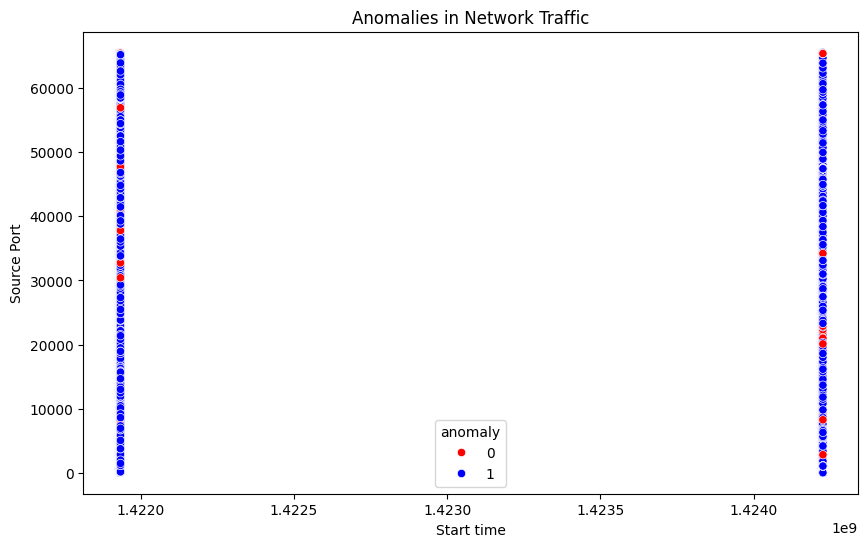

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start time', y='Source Port', data=data, hue='anomaly', palette={0: 'red', 1: 'blue'})
plt.title('Anomalies in Network Traffic')
plt.show()


In [13]:
data['anomaly'] = [1 if pred == 1 else 0 for pred in predictions]

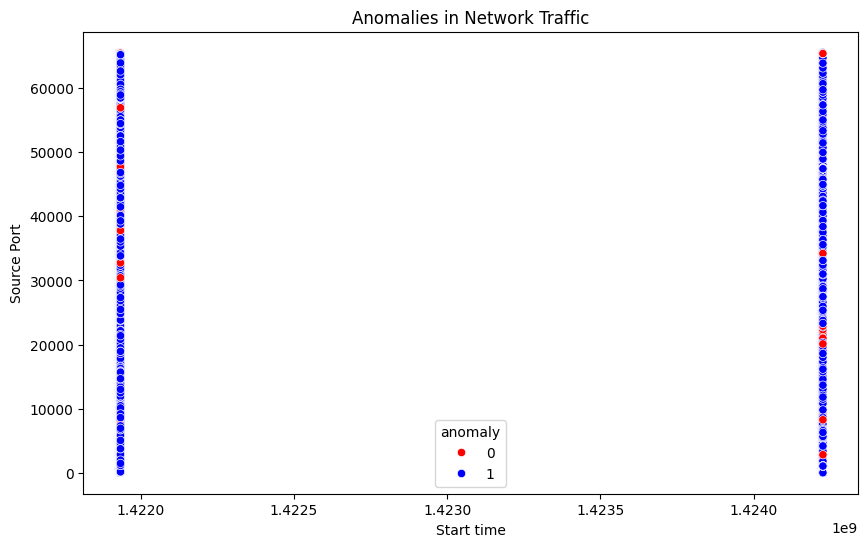

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start time', y='Source Port', data=data, hue='anomaly', palette={0: 'red', 1: 'blue'})
plt.title('Anomalies in Network Traffic')
plt.show()


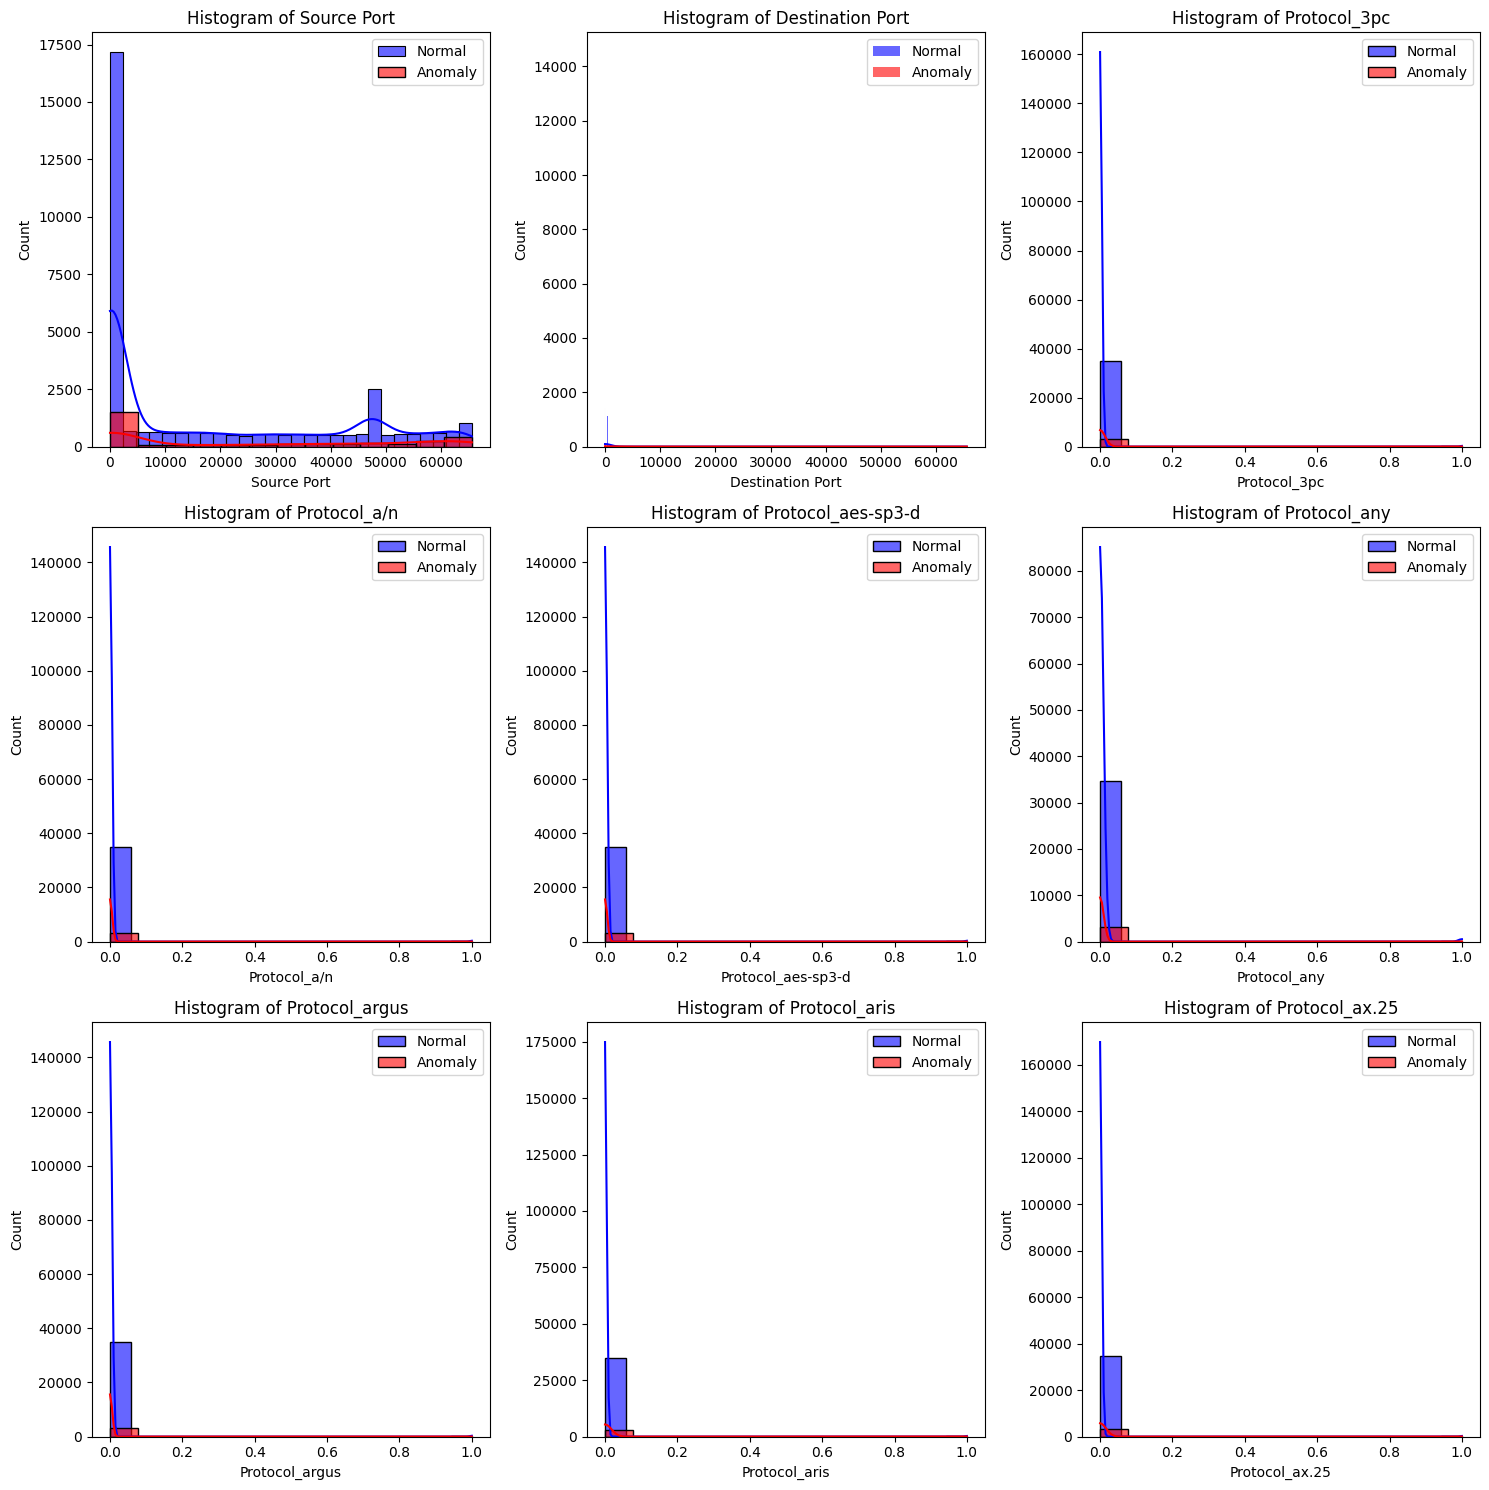

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.ravel()
for i, col in enumerate(features.columns[:9]):  # Limiting to the first 9 features for visualization
    sns.histplot(data[data['anomaly'] == 1][col], ax=axs[i], kde=True, color='blue', label='Normal', alpha=0.6)
    sns.histplot(data[data['anomaly'] == 0][col], ax=axs[i], kde=True, color='red', label='Anomaly', alpha=0.6)
    axs[i].set_title(f'Histogram of {col}')
    axs[i].legend()
plt.tight_layout()
plt.show()

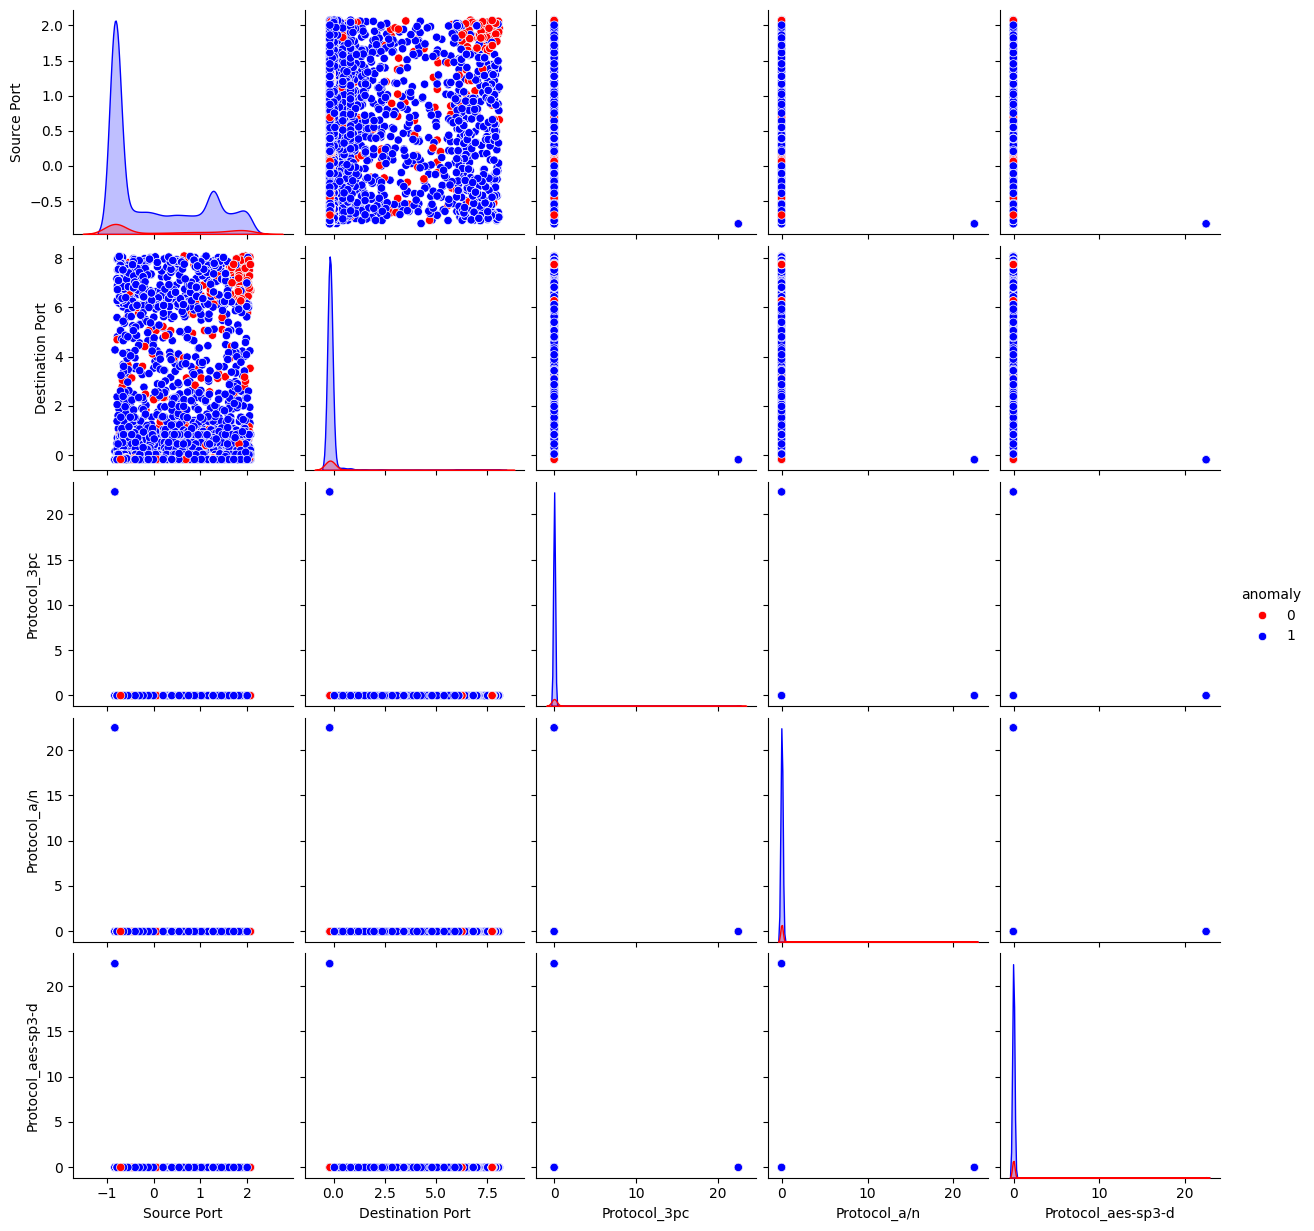

In [16]:
pair_plot_features = features_scaled[:, :5]  # Limiting to the first 5 features for visualization
pair_plot_df = pd.DataFrame(pair_plot_features, columns=features.columns[:5])
pair_plot_df['anomaly'] = data['anomaly']
sns.pairplot(pair_plot_df, hue='anomaly', palette={0: 'red', 1: 'blue'})
plt.show()

In [18]:
if 'label' in data.columns:
    print(classification_report(data['label'], predictions))
    cm = confusion_matrix(data['label'], predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()